Name: Sanjeev Kumar Khatri

Roll no : 23

Group : CS

Assignment : 01

## Practical Assignemnt - 1 ##
1. Getting started with Python Machine Learning Introduction to NumPy, SciPy, and Matplotlib Installing with Python
2. Chewing data efficiently with NumPy and intelligently with SciPy
3. Learning NumPy, SciPy
4. First application of machine learning
  * Reading in the data
  * Preprocessing and cleaning the data
   * Choosing the right model and learning algorithm

###1. Learning Numpy ###

In [1]:
# importing numpy
import numpy as np 
np.version.full_version

'1.21.6'

In [2]:
a = np.array([0,1,2,3,4,5])
a

array([0, 1, 2, 3, 4, 5])

In [3]:
# for dimension and shape
a.ndim , a.shape


(1, (6,))

In [4]:
# converting this array into two-dimensional array
b = a.reshape((3,2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [5]:
b.ndim , b.shape

(2, (3, 2))

It is important to realize just how much the NumPy package is optimized. For example, doing the following avoids copies wherever possible:

In [6]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [7]:
a

array([ 0,  1, 77,  3,  4,  5])

we can say here `a[2]` has also changed

For `copy`:


In [8]:
c = a.reshape((3,2)).copy()
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [9]:
c[0][0] = -99
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

Value of `a[0]` remain unchanged:

In [10]:
a

array([ 0,  1, 77,  3,  4,  5])

Multiplying a NumPy array will result in an array of the same size

In [11]:
d = np.array([1,2,3,4,5])
d*2

array([ 2,  4,  6,  8, 10])

In [12]:
d**2

array([ 1,  4,  9, 16, 25])

This works differently in python lists

In [13]:
[1,2,3,4,5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [14]:
[1,2,3,4,5] ** 2

TypeError: ignored

#### Indexing ####

In addition to normal list indexing, it allows you to use arrays themselves as indices by performing the following:

* One can use a list as an index itself, which will then pick the elements individually from that dimension:

In [15]:
a[np.array([2,3,4])]

array([77,  3,  4])

In normal list


In [16]:
a[[2,3,4]]

array([77,  3,  4])

In [17]:
a>4 # check with every element of an array

array([False, False,  True, False, False,  True])

In [18]:
a[a>4] # give the element greater than 4

array([77,  5])

In [19]:
a[a>4] = 4 # changint the elements to 4 which are greater than 4
a

array([0, 1, 4, 3, 4, 4])

In [20]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

#### Handling the Nonexistent values (NAN)####

In [21]:
# lets pretend we have read this from a texxt file:
c = np.array([1,2,np.NAN , 3, 4])
c

array([ 1.,  2., nan,  3.,  4.])

In [22]:
np.isnan(c)

array([False, False,  True, False, False])

In [23]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [24]:
np.mean(c[~np.isnan(c)])

2.5

#### Comparing the runtime ####

* Python lists vs Numpy 

In [25]:
import timeit

normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number = 10000)

naive_np_sec = timeit.timeit('sum(na * na)' , setup = "import numpy as np ; na = np.arange(1000)", number = 10000)

good_np_sec = timeit.timeit('na.dot(na)', setup = "import numpy as np ; na = np.arange(1000)" , number = 10000)


print(f"Normal python : %f sec" % normal_py_sec)
print(f"Naive Numpy : %f sec" % naive_np_sec)
print(f"Good Numpy : %f sec" % good_np_sec)


Normal python : 2.381367 sec
Naive Numpy : 2.182774 sec
Good Numpy : 0.046677 sec


In [26]:
a = np.array([1,2,3])
a.dtype

dtype('int64')

In [27]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U21')

In [28]:
np.array([1 , "stringy" , {1,2,3}])

array([1, 'stringy', {1, 2, 3}], dtype=object)

### 2. Learning Scipy ###

In [29]:
import scipy 
scipy.version.full_version

'1.7.3'

In [30]:
scipy.dot is np.dot

False

Reading the data 

In [31]:
data = np.genfromtxt("web_traffic.tsv" , delimiter = "\t")
print(data[:12])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]
 [1.10000000e+01 1.14024109e+03]
 [1.20000000e+01 1.47834180e+03]]


In [32]:
data.shape

(743, 2)

In [33]:
x = data[:,0]
y = data[:,1]

Checking the NAN value in x and y :

In [34]:
np.sum(np.isnan(y)) , np.sum(np.isnan(x))

(8, 0)

In [35]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

In [36]:
np.sum(np.isnan(y))

0

Using `Matplotlib` to plot the scatter plot of the given data 

In [38]:
import matplotlib.pyplot as plt

def plot_web_traffic(x , y ,models = None , mx =  None):
  """
  Plot the web traffic (y) over time (x).
  If models is given, it is expected to be a list of fitted models,
  Which will be ploted as well
  """

  plt.figure(figsize = (12,6)) # widthe and height of the plot in inches
  plt.scatter(x , y,s =10)
  plt.title("Web traffic over the last month")

  plt.xlabel("Time")
  plt.ylabel("Hits/hour")
  plt.xticks(
      [
       w * 7 * 24 for w in range(5)
       ],
      [
       'week %i' %(w + 1) for w in range(5)
      ])
  if models:
    colors = ['g' , 'k' , 'b' , 'm' , 'r']
    linestyles = ['-' , '-.' , '--' , ':' , '-']

    
    mx =  np.linspace(0, x[-1],1000)
    for model ,style ,color in zip(models , linestyles , colors):
      plt.plot(mx ,model(mx) , linestyle = style , linewidth = 2 , c = color)
    
    plt.legend(["d = %i" %m.order for m in models], loc = "upper left")
    
    plt.autoscale(tight = True)
    plt.grid()

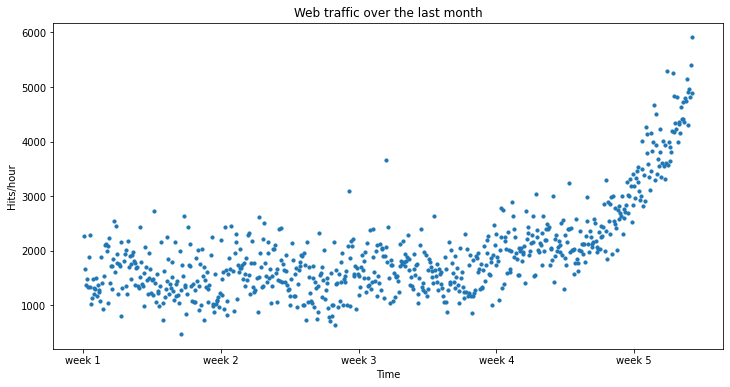

In [39]:
%matplotlib inline
plot_web_traffic(x , y)

For saving :




In [40]:
plt.savefig("web_traffic.png")

<Figure size 432x288 with 0 Axes>

### Choosing the right model and learning algorithm ###



We will use scipy's polynomial fiting functions

In [41]:
fp1 = np.polyfit(x , y ,1)
fp1

array([  2.58462016, 996.50674246])

In [42]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


using squared distance as error

In [43]:
def error(f,x,y):
  return np.sum((f(x) - y) ** 2)

In [44]:
f1 = np.poly1d(fp1)
print(error(f1,x,y))

319531507.0208318


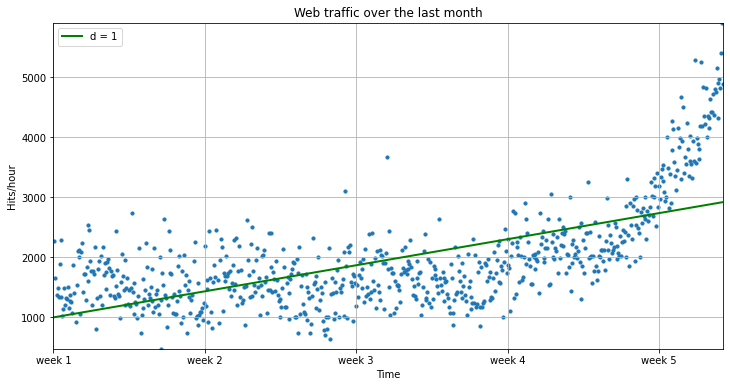

In [45]:
plot_web_traffic(x , y , [f1])

Lets now fit a more complex model, a polynomial of degree 2 , to see whether it better understands our data.

In [46]:
f2p = np.polyfit(x , y ,2)
f2p

array([ 1.05605675e-02, -5.29774287e+00,  1.98466917e+03])

In [47]:
f2 = np.poly1d(f2p)
error(f2,x,y)

181347660.75761026

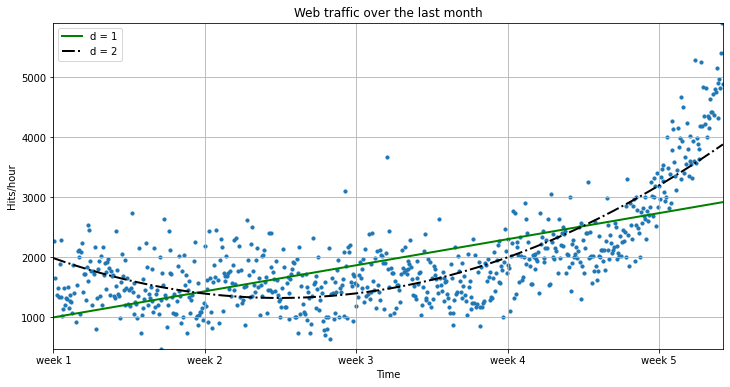

In [48]:
plot_web_traffic(x , y , [f1,f2])

Lets increase the complexity and try degree 3,10 and 100

/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


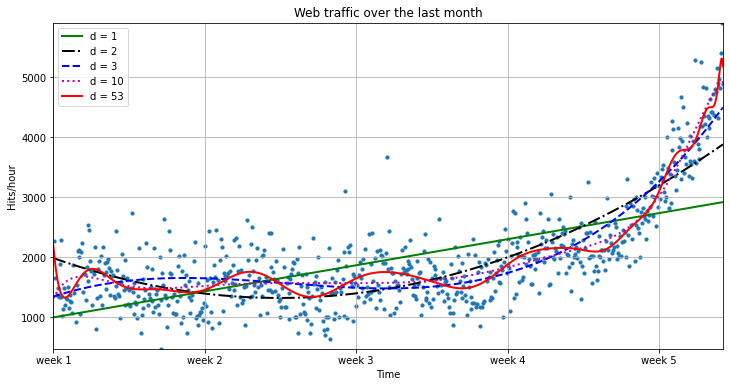

In [49]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f10 = np.poly1d(np.polyfit(x,y,10))
f100 = np.poly1d(np.polyfit(x , y , 100))

plot_web_traffic(x , y , [f1,f2 ,f3,f10 ,f100])





In [50]:
print("Errors for the complete data set:")
for f in [f1,f2,f3,f10,f100]:
  print("td=%i : %f" %(f.order , error(f,x,y)))

Errors for the complete data set:
td=1 : 319531507.020832
td=2 : 181347660.757610
td=3 : 140576460.879682
td=10 : 123426935.751807
td=53 : 110768258.483735


Out of the five fitted models, the first-order model is clearly too simple, and the models of order 10 and 53 are clearly overfitting. Only the second- and third-order models seem to somehow match the data. However, if we extrapolate them at both borders, we see them going berserk.

#### Stepping back to go forward - another look at our data ####
* finding the inflection point between weeks 3 and 4 . let's separate the data and train two lines using week 3.5 as a separation point:


In [51]:
inflection = int(3.5 * 7 * 24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa,ya,1))
fb = np.poly1d(np.polyfit(xb, yb ,1))

fa_error = error(fa,xa,ya)
fb_error = error(fb,xb , yb)
print(f"Error inflection = ",(fa_error + fb_error))

Error inflection =  134390576.31295496


These two lines seems to be a much better fit to the data than the previous model.

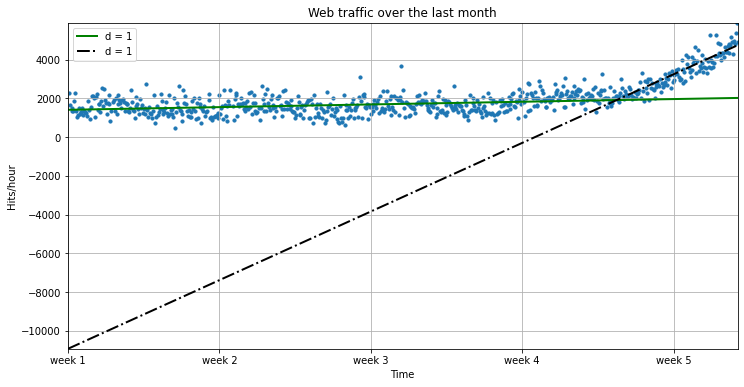

In [52]:
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

plot_web_traffic(x, y, [fa, fb])